In [1]:
# Importamos las lbrerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Style

In [2]:
# Lectura con pandas de los archivos CSV 
df_1 = pd.read_csv('str_1.csv', delimiter=';')
df_2 = pd.read_csv('str_2.csv', delimiter=';')

df = pd.concat([df_1, df_2], ignore_index=True)

In [3]:
# Observamos los primeros registros del dataframe
df.head()

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [4]:
# Eliminamos la columna ID
df.drop('ID', axis=1, inplace=True)

In [5]:
# Verificamos que se elimino la columna ID
df.head()

,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


## VALORES ERRÓNEOS Y/O FALTANTES

In [6]:
# Observamos los valores faltantes
df.isnull().sum()

protocol                  0
browser_type              0
login_attempts          128
duration                  0
packet_size               0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
unusual_time_access       0
attack                    0
dtype: int64

In [7]:
# Asignar a los valores faltantes de intentos de login la mediana ya que son numeros naturales
df['login_attempts'].fillna(df['login_attempts'].median(), inplace=True)

C:\Users\Santiago\AppData\Local\Temp\ipykernel_2540\1188450550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['login_attempts'].fillna(df['login_attempts'].median(), inplace=True)


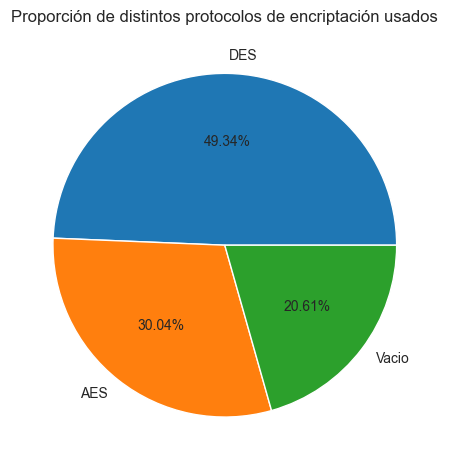

In [8]:
# Protocolo de encriptación
df_encryption_used = pd.DataFrame(df['encryption_used'])
df_encryption_used.fillna('Vacio', inplace=True)

plt.pie(df_encryption_used['encryption_used'].value_counts(), labels=df_encryption_used['encryption_used'].unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos protocolos de encriptación usados')

plt.tight_layout()
plt.show()

In [9]:
# Para los datos faltantes del protocolo de encriptación
# Obtener distribución original (sin NaN)
dist = df['encryption_used'].value_counts(normalize=True)

# Generar valores aleatorios con esa distribución
missing_count = df['encryption_used'].isna().sum()
imputed_values = np.random.choice(dist.index, size=missing_count, p=dist.values)

# Reemplazar NaNs con los valores generados
df.loc[df['encryption_used'].isna(), 'encryption_used'] = imputed_values

# Si la variable tiene correlación con otras podrías entrenar un modelo de clasificación

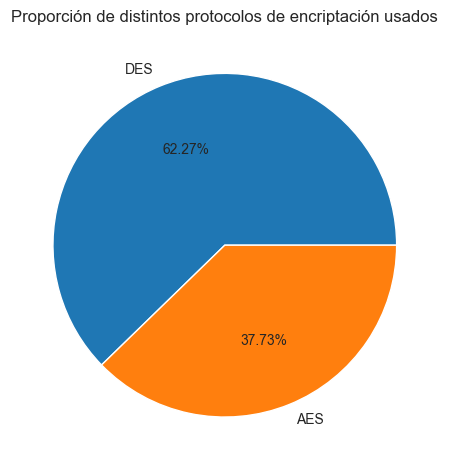

In [10]:
# Protocolo de encriptación
plt.pie(df['encryption_used'].value_counts(), labels=df['encryption_used'].unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos protocolos de encriptación usados')

plt.tight_layout()
plt.show()

In [11]:
# Verificamos los valores faltantes
df.isnull().sum()

protocol               0
browser_type           0
login_attempts         0
duration               0
packet_size            0
encryption_used        0
ip_reputation_score    0
failed_logins          0
unusual_time_access    0
attack                 0
dtype: int64

## VALORES ATÍPICOS

<Axes: >

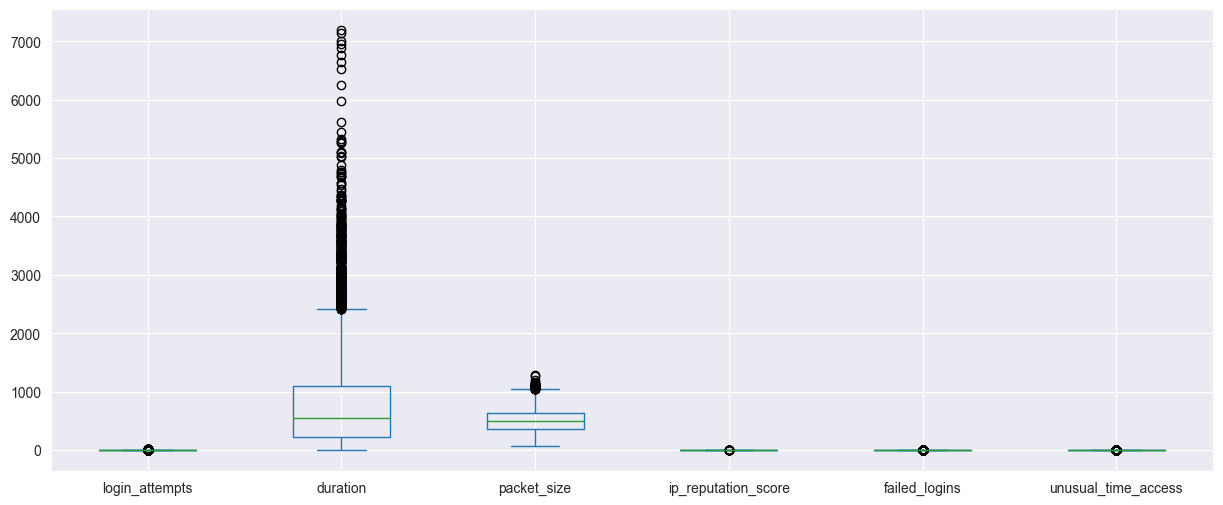

In [12]:
# Boxplot para visualizar valores atípicos
# Visualizamos la distribución de las distintas variables
fig, ax = plt.subplots(figsize=(15,6))
df.plot(kind='box', ax=ax)

## PROCESAMIENTO DE VARIABLES CATEGÓRICAS

In [13]:
df = pd.get_dummies(df, columns=['protocol','browser_type'], dtype=int)
df = pd.get_dummies(df, columns=['encryption_used', 'unusual_time_access'], dtype=int)

In [14]:
df.head()

,login_attempts,duration,packet_size,ip_reputation_score,failed_logins,attack,protocol_ICMP,protocol_TCP,protocol_UDP,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown,encryption_used_AES,encryption_used_DES,unusual_time_access_0,unusual_time_access_1
0,4.0,492.983263,599,0.606818,1,Y,0,1,0,0,1,0,0,0,0,1,1,0
1,3.0,1557.996461,472,0.301569,0,N,0,1,0,0,0,1,0,0,0,1,1,0
2,3.0,75.044262,629,0.739164,2,Y,0,1,0,1,0,0,0,0,0,1,1,0
3,4.0,601.248835,804,0.123267,0,Y,0,0,1,0,0,0,0,1,0,1,1,0
4,5.0,532.540888,453,0.054874,1,N,0,1,0,0,0,1,0,0,1,0,1,0


Los valores de la variable categórica que representa nuestras etiquetas son Strings 'Y' y 'N' representando fue atacado o no. Cambiamos estos resultados por 1 para la etiqueta 'Y' y 0 para la etiqueta 'N'.

In [15]:
# Visualizar los valores de la columna (unique).
df['attack'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
# Cambiar los valores Y y N de la columna "attack" por 1 y 0
df['attack'] = df['attack'].map({'Y':1,'N':0})

In [17]:
# Visualizar los valores de la columna (unique).
df['attack'].unique()

array([1, 0])

## BALANCE DEL CONJUNTO DE DATOS

In [18]:
# Visualizar el balance del dataset
df['attack'].value_counts()

attack
0    5273
1    4264
Name: count, dtype: int64

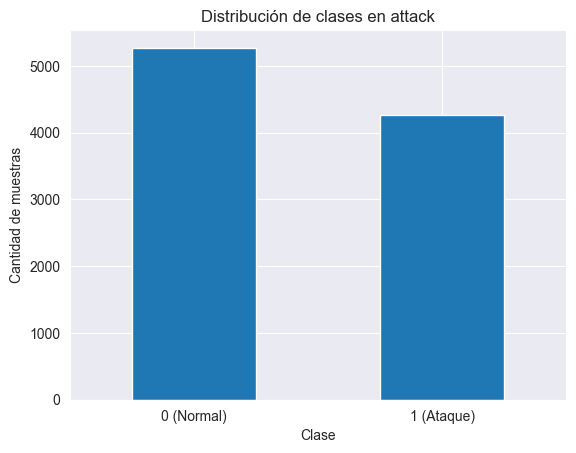

In [19]:
# Visualización grafica
df['attack'].value_counts().plot(kind='bar')
plt.title('Distribución de clases en attack')
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.xticks([0, 1], ['0 (Normal)', '1 (Ataque)'], rotation=0)
plt.show()

In [20]:
# Importamos la libreira necesaria
from imblearn.over_sampling import SMOTE

In [21]:
# Nos guradamos las etiquetas en un vector auxiliar
attack = df['attack']

# Aplicamos el over_sampling de los datos

df, attack = SMOTE().fit_resample(df, attack)

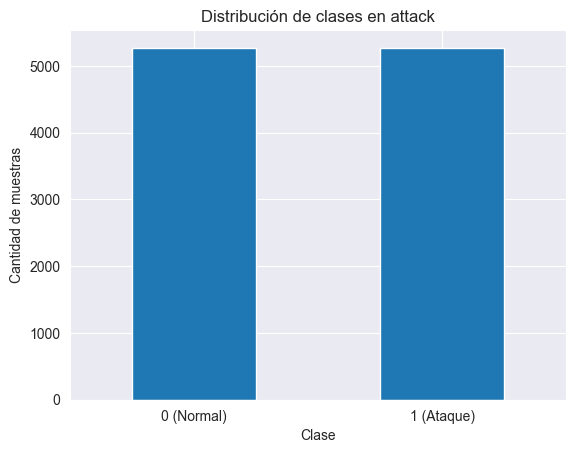

In [22]:
# Visualización grafica
df['attack'].value_counts().plot(kind='bar')
plt.title('Distribución de clases en attack')
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.xticks([0, 1], ['0 (Normal)', '1 (Ataque)'], rotation=0)
plt.show()

In [23]:
df['attack'].value_counts()

attack
1    5273
0    5273
Name: count, dtype: int64

Otro

In [ ]:
# Importar el paquete imblearn
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Separar features (X) y la variable objetivo (y)
X = df.drop('attack', axis=1)
y = df['attack']

In [ ]:
# Visualizar el balance del dataset
sns.countplot(x=y)

In [ ]:
# Generar un nuevos conjunto de datos balanceado por Over-sampling
# Definimos la estrategia de Oversampling, la clase minoritaria tendrá la misma cantidad que la mayoritaria.
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
# Generamos el nuevo dataset balanceado
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
# Visualizar el balance del dataset generado
sns.countplot(x=y_over)

## NORMALIZACIÓN DEL CONJUNTO DE DATOS

In [25]:
# Selección de variables numéricas
num_cols = ['login_attempts', 'duration', 'packet_size', 'ip_reputation_score', 'failed_logins']


# Filtramos los datos
data_numeric = df[num_cols]


# Calculamos la media y desviación estándar
means = data_numeric.mean()
stds = data_numeric.std()


# Aplicamos la normalización Z-score
data_scaled = (data_numeric - means) / stds


# Reemplazamos en el DataFrame original
# df_scaled = df.copy()
# df_scaled[num_cols] = data_scaled
df[num_cols] = data_scaled

# **Modelado**

In [26]:
# Carga de los paquetes necesarios
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

In [27]:
# Visualizar las columnas del dataframe
df.columns

Index(['login_attempts', 'duration', 'packet_size', 'ip_reputation_score',
       'failed_logins', 'attack', 'protocol_ICMP', 'protocol_TCP',
       'protocol_UDP', 'browser_type_Chrome', 'browser_type_Edge',
       'browser_type_Firefox', 'browser_type_Safari', 'browser_type_Unknown',
       'encryption_used_AES', 'encryption_used_DES', 'unusual_time_access_0',
       'unusual_time_access_1'],
      dtype='object')

In [28]:
# Seleccionar las columnas del dataset "df" que corresponden a las entradas del modelo y la salida esperada.
X = df[['login_attempts', 'duration', 'packet_size', 'ip_reputation_score',
       'failed_logins', 'attack', 'protocol_ICMP', 'protocol_TCP',
       'protocol_UDP', 'browser_type_Chrome', 'browser_type_Edge',
       'browser_type_Firefox', 'browser_type_Safari', 'browser_type_Unknown',
       'encryption_used_AES', 'encryption_used_DES', 'unusual_time_access_0',
       'unusual_time_access_1']]
y = df['attack'] 

# **Modelos de clasificación'**

In [ ]:
X.head()

## Partición del conjunto de datos

In [287]:
# Separar el conjunto de datos en una particion para entrenamiento y una para test con el 30% del conjunto.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [288]:
# Visualizar el resultado de la función (shape)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(10546, 18) (9491, 18) (1055, 18)
(10546,) (9491,) (1055,)


## Árbol de Decisión

In [289]:
# Instanciar un Arbol de Decisión
model_Tree1 = DecisionTreeClassifier(max_features=1, max_depth=3)

model_Tree2 = DecisionTreeClassifier(max_features=3, max_depth=3)

model_Tree3 = DecisionTreeClassifier(max_features=3, max_depth=6)


# Entrenar el modelo con el conjunto de entrenamiento
model_Tree1.fit(X_train, y_train)
model_Tree2.fit(X_train, y_train)
model_Tree3.fit(X_train, y_train)

# Calculando la precisión para el conjunto de entrenamiento
X_train_prediction1 = model_Tree1.predict(X_train)
X_train_prediction2 = model_Tree2.predict(X_train)
X_train_prediction3 = model_Tree3.predict(X_train)

train_accuracy1 = accuracy_score(X_train_prediction1, y_train)
train_f1_1 = f1_score(X_train_prediction1, y_train)

train_accuracy2 =  accuracy_score(X_train_prediction2, y_train)
train_f1_2 = f1_score(X_train_prediction2, y_train)

train_accuracy3 = accuracy_score(X_train_prediction3, y_train)
train_f1_3 = f1_score(X_train_prediction3, y_train)


print('Accuracy para los datos de entrenamiento, para el primer arbol : ', train_accuracy1)
print('Precision para los datos de entrenamiento, para el primer arbol : ', train_f1_1)

print("-----------------------------")

print('Accuracy para los datos de entrenamiento, para el segundo arbol : ', train_accuracy2)
print('Precision para los datos de entrenamiento, para el segundo arbol : ', train_f1_2)

print("-----------------------------")

print('Accuracy para los datos de entrenamiento, para el tercer arbol : ', train_accuracy3)
print('Precision para los datos de entrenamiento, para el tercer arbol : ', train_f1_3)


Accuracy para los datos de entrenamiento, para el primer arbol :  0.6089979981034664
Precision para los datos de entrenamiento, para el primer arbol :  0.5399776868724433
-----------------------------
Accuracy para los datos de entrenamiento, para el segundo arbol :  0.6437677800021072
Precision para los datos de entrenamiento, para el segundo arbol :  0.46663511594888785
-----------------------------
Accuracy para los datos de entrenamiento, para el tercer arbol :  0.9997892740490991
Precision para los datos de entrenamiento, para el tercer arbol :  0.9997900923593619


## Modelo KNN





In [290]:
model_KNN1 = KNeighborsClassifier(n_neighbors=3)
model_KNN2 = KNeighborsClassifier(n_neighbors=4)
model_KNN3 = KNeighborsClassifier(n_neighbors=5)

model_KNN1.fit(X_train, y_train)
model_KNN2.fit(X_train, y_train)
model_KNN3.fit(X_train, y_train)

# Calculando la precisión para el conjunto de entrenamiento
X_train_prediction1 = model_KNN1.predict(X_train)
X_train_prediction2 = model_KNN2.predict(X_train)
X_train_prediction3 = model_KNN3.predict(X_train)

train_accuracy1 = accuracy_score(X_train_prediction1, y_train)
train_f1_1 = f1_score(X_train_prediction1, y_train)
print('Accuracy para los datos de entrenamiento, para el primer KNN : ', train_accuracy1)
print('Puntaje f1 para los datos de entrenamiento, para el primer KNN : ',train_f1_1)

print("-----------------------------")

train_accuracy2 = accuracy_score(X_train_prediction2, y_train)
train_f1_2 = f1_score(X_train_prediction2, y_train)
print('Accuracy para los datos de entrenamiento, para el segundo KNN : ', train_accuracy2)
print('Puntaje f1 para los datos de entrenamiento, para el segundo KNN : ', train_f1_2)

print("-----------------------------")

train_accuracy3 = accuracy_score(X_train_prediction3, y_train)
train_f1_3 = f1_score(X_train_prediction3, y_train)
print('Accuracy para los datos de entrenamiento, para el tercer KNN : ', train_accuracy3)
print('Puntaje f1 para los datos de entrenamiento, para el tercer KNN : ', train_f1_3)


Accuracy para los datos de entrenamiento, para el primer KNN :  0.9915709619639659
Puntaje f1 para los datos de entrenamiento, para el primer KNN :  0.991537973344616
-----------------------------
Accuracy para los datos de entrenamiento, para el segundo KNN :  0.9789274049099147
Puntaje f1 para los datos de entrenamiento, para el segundo KNN :  0.9785545785974694
-----------------------------
Accuracy para los datos de entrenamiento, para el tercer KNN :  0.9880939837741017
Puntaje f1 para los datos de entrenamiento, para el tercer KNN :  0.9879953256135132
